In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

In [84]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [86]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [87]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include=['object','category']).columns

print(num_cols)
print(cat_cols)

Index(['total_bill', 'tip', 'size'], dtype='object')
Index(['sex', 'smoker', 'day', 'time'], dtype='object')


In [88]:
df[num_cols].isnull().sum()

total_bill    0
tip           0
size          0
dtype: int64

In [89]:
df[cat_cols].isnull().sum()

sex       0
smoker    0
day       0
time      0
dtype: int64

No missing values

Explore distribution and skew

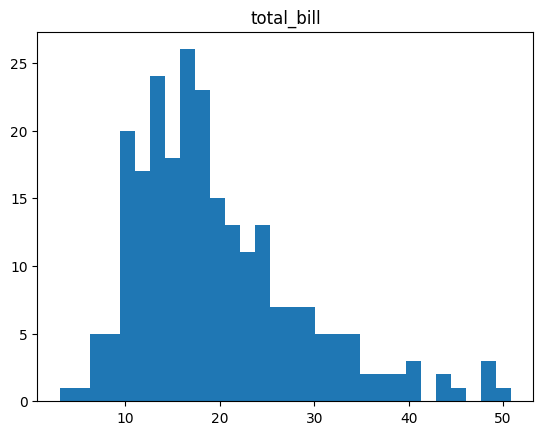

total_bill skew: 1.1332130376158205
------------------------------


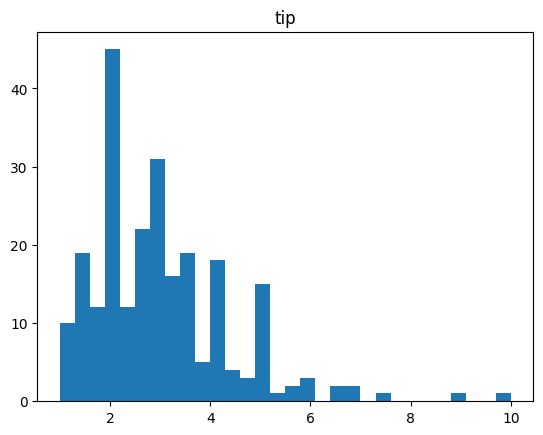

tip skew: 1.4654510370979401
------------------------------


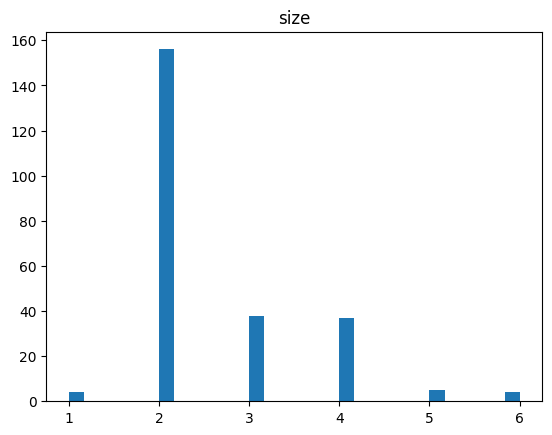

size skew: 1.4478815386834785
------------------------------


In [90]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.hist(df[col].dropna(),bins=30)
    plt.title(col)
    plt.show()
    print(f"{col} skew:",df[col].skew())
    print("-"*30)

In [91]:
def cap_outliers(df,cols):
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

In [92]:
df=cap_outliers(df,num_cols)


In [93]:
for col in cat_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

df=pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [94]:
df[num_cols].skew()

total_bill    0.842031
tip           0.706711
size          1.006989
dtype: float64

In [95]:
df[num_cols].describe()


,total_bill,tip,size
count,244.00000,244.000000,244.000000
mean,19.59167,2.950026,2.534836
std,8.35276,1.225609,0.852143
min,3.07000,1.000000,1.000000
25%,13.34750,2.000000,2.000000
50%,17.79500,2.900000,2.000000
75%,24.12750,3.562500,3.000000
max,40.29750,5.906250,4.500000


In [96]:
df

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01000,2.0,True,True,False,False,True,True
1,10.34,1.66000,3.0,False,True,False,False,True,True
2,21.01,3.50000,3.0,False,True,False,False,True,True
3,23.68,3.31000,2.0,False,True,False,False,True,True
4,24.59,3.61000,4.0,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...
239,29.03,5.90625,3.0,False,True,False,True,False,True
240,27.18,2.00000,2.0,True,False,False,True,False,True
241,22.67,2.00000,2.0,False,False,False,True,False,True
242,17.82,1.75000,2.0,False,True,False,True,False,True


Scaling

In [97]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

In [98]:
df[num_cols].describe()

,total_bill,tip,size
count,2.440000e+02,2.440000e+02,2.440000e+02
mean,-3.758378e-16,-2.184045e-17,2.766457e-16
std,1.002056e+00,1.002056e+00,1.002056e+00
min,-1.982055e+00,-1.594337e+00,-1.804851e+00
25%,-7.490943e-01,-7.767389e-01,-6.289266e-01
50%,-2.155411e-01,-4.090083e-02,-6.289266e-01
75%,5.441499e-01,5.007577e-01,5.469975e-01
max,2.484016e+00,2.417003e+00,2.310884e+00


Feature Engneering

In [99]:
df['tip_percent']=df['tip']/df['total_bill']
df['bill_per_person']=df['total_bill']/df['size']

Encode categorical variables

In [100]:
cat_cols

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [101]:
df.columns

Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner', 'tip_percent', 'bill_per_person'],
      dtype='object')

In [102]:
df

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,tip_percent,bill_per_person
0,-0.312115,-1.586161,-0.628927,True,True,False,False,True,True,5.081982,0.496265
1,-1.109895,-1.054722,0.546997,False,True,False,False,True,True,0.950290,-2.029068
2,0.170153,0.449658,0.546997,False,True,False,False,True,True,2.642671,0.311067
3,0.490465,0.294314,-0.628927,False,True,False,False,True,True,0.600072,-0.779844
4,0.599635,0.539594,1.722922,True,True,False,False,True,True,0.899871,0.348034
...,...,...,...,...,...,...,...,...,...,...,...
239,1.132288,2.417003,0.546997,False,True,False,True,False,True,2.134618,2.070006
240,0.910349,-0.776739,-0.628927,True,False,False,True,False,True,-0.853232,-1.447465
241,0.369298,-0.776739,-0.628927,False,False,False,True,False,True,-2.103285,-0.587188
242,-0.212542,-0.981138,-0.628927,False,True,False,True,False,True,4.616210,0.337944


Correlation

In [103]:
corr=df.corr()['tip'].sort_values(ascending=False)
corr

tip                1.000000
total_bill         0.654450
size               0.502737
day_Sun            0.162806
time_Dinner        0.118722
tip_percent        0.054308
smoker_No         -0.001217
day_Sat           -0.045785
day_Fri           -0.051150
sex_Female        -0.075106
bill_per_person   -0.087276
Name: tip, dtype: float64

In [104]:
selected_features=corr[abs(corr)>0.1].index
selected_features

Index(['tip', 'total_bill', 'size', 'day_Sun', 'time_Dinner'], dtype='object')

Variance Threshold

In [106]:
from sklearn.feature_selection import VarianceThreshold

X=df.drop(columns='tip')
selector=VarianceThreshold(threshold=0.01)
X_var=selector.fit_transform(X)

X.columns[selector.get_support()]

Index(['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat',
       'day_Sun', 'time_Dinner', 'tip_percent', 'bill_per_person'],
      dtype='object')